## WACCM Analysis

In [2]:
import csv
import pandas as pd
import numpy as np
from numpy import newaxis
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math
from netCDF4 import Dataset
#from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid, cm
#%pylab inline --no-import-all
%matplotlib inline

In [3]:
def ncdump(nc_fid, verb=True):
    '''
    ncdump outputs dimensions, variables and their attribute information.
    The information is similar to that of NCAR's ncdump utility.
    ncdump requires a valid instance of Dataset.

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print(("\t\ttype:", repr(nc_fid.variables[key].dtype)))
            for ncattr in nc_fid.variables[key].ncattrs():
                print(('\t\t%s:' % ncattr,\
                      repr(nc_fid.variables[key].getncattr(ncattr))))
        except KeyError:
            print(("\t\tWARNING: %s does not contain variable attributes" % key))

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print("NetCDF Global Attributes:")
        for nc_attr in nc_attrs:
            print('\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr)))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if verb:
        print("NetCDF dimension information:")
        for dim in nc_dims:
            print("\tName:", dim) 
            print("\t\tsize:", len(nc_fid.dimensions[dim]))
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print("NetCDF variable information:")
        for var in nc_vars:
            if var not in nc_dims:
                print('\tName:', var)
                print("\t\tdimensions:", nc_fid.variables[var].dimensions)
                print("\t\tsize:", nc_fid.variables[var].size)
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

In [4]:
def display_attr():
    """Displays attributes, dimensions, and variables for a WACCM netCDF4 dataset object."""
    nc_f = './sdwaccm_tuzgw_2009_01_15_00000.nc'
    nc_fid = Dataset(nc_f, mode='r')

    nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)
    
display_attr()

NetCDF Global Attributes:
	Conventions: 'CF-1.0'
	source: 'CAM'
	case: 'f.e20.FXSD.f19_f19.001'
	logname: 'federico'
	host: 'cheyenne1'
	initial_file: '/glade/p/cesmdata/cseg/inputdata/atm/waccm/ic/f.e21.machem01_cam6_0_024.FXSD.spinup.03.cam.i.2000-01-01-00000_c181017.nc'
	topography_file: '/glade/p/cesmdata/cseg/inputdata/atm/cam/met/MERRA2/1.9x2.5/USGS-gtopo30_1.9x2.5_remap_MERRA2_c180824.nc'
	model_doi_url: 'https://doi.org/10.5065/D67H1H0V'
	time_period_freq: 'hour_3'
	history: 'Mon Jun 15 12:19:04 2020: ncks -v T,U,Z3,UTGW_TOTAL,lat,lon,lev,date,time f.e20.FXSD.f19_f19.001.cam.h1.2009-01-15-00000.nc sdwaccm_tuzgw_2009_01_15_00000.nc'
	NCO: 'netCDF Operators version 4.7.9 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)'
NetCDF dimension information:
	Name: time
		size: 8
('\t\ttype:', "dtype('float64')")
('\t\tlong_name:', "'time'")
('\t\tunits:', "'days since 2008-03-24 00:00:00'")
('\t\tcalendar:', "'gregorian'")
('\t\tbounds:', "'time_bnds'")
	Name: lat
		size:

### Construct Lists of WACCM Data Files 

In [5]:
data2009 = []
#01/2009 dates
for day in range(15, 32):
    data2009.append('./sdwaccm_tuzgw_2009_01_'+str(day)+'_00000.nc')
#02/2009 dates
for day in range(1, 16):
    if day < 10:
        data2009.append('./sdwaccm_tuzgw_2009_02_0'+str(day)+'_00000.nc')
    else:
        data2009.append('./sdwaccm_tuzgw_2009_02_'+str(day)+'_00000.nc')
        
#01/2013 dates
data2013 = []
for day in range(1, 32):
    if day < 10:
        data2013.append('./sdwaccm_tuzgw_2013_01_0'+str(day)+'_00000.nc')
    else:
        data2013.append('./sdwaccm_tuzgw_2013_01_'+str(day)+'_00000.nc')

In [ ]:
test_list = [[['doublenestedlist1, nestedlist1, elem1', 'doublenestedlist1, nestedlist1, elem2'], ['doublenestedlist1, nestedlist2, elem1']]]
with open('test.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(test_list)

In [6]:
#attempting to use pandas timestamp attr/methods
# dfs = []
# for date in pd.date_range('2009-01-15', '2009-02-15'):
#     dfs.append('./sdwaccm_tuzgw_'+str(date.year)+'_'+str(date.month)+'_'+str(date.day)+'_00000.nc')
# drange = pd.date_range('2009-01-15', '2009-02-15')
# drange[0]

In [7]:
nc_f = './sdwaccm_tuzgw_2009_01_15_00000.nc'
nc_fid = Dataset(nc_f, mode='r')

temp = nc_fid.variables['T'][:]
wind = nc_fid.variables['U'][:]

time = nc_fid.variables['time'][:] #days since 03/24/2008
lev = nc_fid.variables['lev'][:]
lat = nc_fid.variables['lat'][:] #96
lon = nc_fid.variables['lon'][:] #144

#alt = nc_fid.variables['Z3'][:] #Z3 array is similar to T array

In [10]:
alt = -7.0 * np.log(lev / 1000.)

### Functions for finding indices of data arrays:

In [11]:
def make_ifinder(arr, val):
    """Given an array, ARR, and value, VAL, return the index corresponding to the array element closest to VAL."""
    diff, index = 1e3, 0
    for i in range(len(arr)):
        if abs(arr[i] - val) < diff:
            diff, index = abs(arr[i] - val), i
    return index
    
def lev_i(p):
    """Return the index corresponding to the pressure levels array value closest to P,
    pressure in hPa.
    """
    assert 0 <= p and p <= 1000, "Pressure level not in range."
    return make_ifinder(lev, p)

def lat_i(deg):
    """Return the index corresponding to the latitudes array value closest to DEG, 
    with positive degrees indicating North.
    """
    assert deg <= 90 and deg >= -90, "Not a valid latitude."
    return make_ifinder(lat, deg)

def lon_i(deg):
    """Return the index corresponding to the longitudes array value closest to DEG, degrees East."""
    assert deg >= 0 and deg <= 360, "Not a valid longitude."
    return make_ifinder(lon, deg)

def alt_i(a):
    """Return the index corresponding to the altitude array value closest to A in kilometers."""
    assert a>= 0 and a<= 200, "Altitude not within range."
    return make_ifinder(alt, a)
cut_alt = alt[alt_i(100): alt_i(200)]

In [12]:
def zonals(df, attrstr):
    """Extracts data from DF, a data file. Returns a 2D array for ATTR with axis0 as pressure levels 
    and axis1 as lines of latitude."""
    nc_f = df
    nc_fid = Dataset(nc_f, mode='r')
    
    attr = nc_fid.variables[attrstr][:]

    #d_avgs[b][c][d] ; b = lev, c = lat, d = lon
    d_avgs = np.sum(attr, axis=0) / len(attr)

    #zonal_means[b][c] ; b = lev, c = lat
    zonal_means = np.sum(d_avgs, axis=2) / len(lon)
    return zonal_means

### Compile Arctic data for individual SSW event

In [13]:
#see if attr='T' will work bc it should
def levlatday(dfs, attrstr):
    """Compile daily average temperatures into a 3D array with axis0=lev, axis1=lat, axis2=day.
    
    DFS - list of data files
    ATTRSTR - string object e.g. 'T' or 'U' """
    arrl = []
    for df in dfs:
        arrl.append(zonals(df, attrstr)[:, :, newaxis])
    return np.ma.concatenate(arrl, axis=2)

def arctic(dfs, attrstr):
    """Return 2D array of daily averages in the Arctic where axis0=lev and axis1=day."""
    return levlatday(dfs, attrstr)[:, lat_i(70)]

In [38]:
levlatday(data2009, 'T')

masked_array(
  data=[[[791.3951 , 796.8319 , 780.42126, ..., 745.92377, 783.689  ,
          807.6489 ],
         [791.08844, 796.5011 , 780.4198 , ..., 745.8567 , 782.9642 ,
          807.22253],
         [791.0189 , 795.76587, 780.1129 , ..., 745.72925, 782.5862 ,
          806.92993],
         ...,
         [585.8225 , 592.128  , 584.7161 , ..., 584.82526, 642.6824 ,
          663.89075],
         [584.33075, 592.17316, 585.6291 , ..., 581.90216, 647.72656,
          665.42615],
         [584.3101 , 592.74274, 586.1861 , ..., 581.17865, 649.573  ,
          666.5371 ]],

        [[790.6645 , 796.3765 , 779.6006 , ..., 745.47217, 782.3965 ,
          805.7232 ],
         [790.3811 , 796.0219 , 779.5474 , ..., 745.3609 , 781.51135,
          805.5921 ],
         [790.319  , 795.3244 , 779.1614 , ..., 745.19507, 781.187  ,
          805.7033 ],
         ...,
         [586.0478 , 592.50446, 584.8532 , ..., 584.85425, 641.9453 ,
          663.50464],
         [584.7347 , 592.3627 , 585.

Misc functions to extract data for scatter plots:

In [14]:
#max on a list will call a function on each element of the list, and then call max on the outputted list
def tmax(dfs, attr):
    """Return a list containing altitudes at which each day's hottest temperature is recorded.
    
    DFS - list of data files
    ATTR - 2D array returned from arctic axis0=lev, axis1=day"""
    #key function takes an index from our selection of altitudes, finds the maximum temperature for a day
    #and returns the index for the alt corresponding to that max temp
    
    M_i = [max(range(alt_i(100), alt_i(20)), key=lambda i: max([attr[i, day]])) for day in range(len(dfs))]
    M = [alt[i] for i in M_i]
    return M

def wminwest(dfs, attr):
    """Return a list containing altitudes at which each day's weakest westerly wind is recorded."""
    mwest_i = []
    for day in range(len(dfs)):
        diff, min_i = 10, 0
        for i in range(alt_i(100), alt_i(20)):
            if attr[i, day] <= 0 and abs(attr[i, day]) < diff:
                diff = abs(attr[i, day])
                min_i = i
        mwest_i.append(min_i)
    mwest = [alt[i] for i in mwest_i]        
    return mwest

def wzeros(dfs, attr):
    """Return two lists of altitudes (km) and times (day) at which wind changes direction."""
    #find every point during the month where wind changes direction??
    #z_i = []
    #similar to the pingpong problem where you record sign=true/false
    #add alt to alt list and day to day list every time the sign changes
    def switch(x):
        if x >= 0:
            direction = True
        else:
            direction = False
        return direction 
    zdays, zeros_i = [], []
    for day in range(len(dfs)):
        for i in range(alt_i(100), alt_i(20)-1):
            if switch(attr[i, day]) != switch(attr[i+1, day]):
                zeros_i.append(i)
                zdays.append(day)
    zalts = [alt[i] for i in zeros_i]
    return zalts, zdays
    


In [15]:
def plot_bfit(dfs):
    """Displays a line of best fit for temperature data. 
    Only visible against non-white background."""
    o = sswstart(dfs)
    start = max(0, o - 5)
    end = min(len(dfs), o + 10)
    temps = arctic(dfs, 'T')
    Mtemps = tmax(dfs, temps)
    x = np.array(range(len(dfs)))
    b, m = polyfit(x[start:end], Mtemps[start:end], 1)
    bfit = plt.plot(x[start:end], m * x[start:end] + b, 'w', dashes=[4,4], mec='black')
    
def slope(dfs):
    """Return slope of a temperature best fit line."""
    o = sswstart(dfs)
    start = max(0, o - 5)
    end = min(len(dfs), o + 10)
    temps = arctic(dfs, 'T')
    Mtemps = tmax(dfs, temps)
    x = np.array(range(len(dfs)))
    b, m = polyfit(x[start:end], Mtemps[start:end], 1)
    return m

In [16]:
def angle(slope):
    """Return angle measured from horizontal."""
    theta = math.atan(slope)
    return abs(math.degrees(theta))

In [17]:
#check with chihoko if ssw starting = wind going from e to w which means if that doesn't happen there's no ssw?
def sswstart(data):
    """Return the date in YY_MM_DD that stratospheric sudden warming begins. 
    None if the year in data files, DFS, does not have this phenomenon occur."""
    winds = arctic(data, 'U')
    winds = winds[lev_i(10), :]
    for day_i in range(len(winds)): 
        if winds[day_i] < 0:
            days_from_zero = day_i
            datestr = data[day_i][16:26]
            return days_from_zero

### Contour plot functions:

In [26]:
len(np.array(range(len(data2009)))) #x 

32

In [27]:
len(alt[alt_i(100): alt_i(20)])

50

In [29]:
arctic(data2009, 'T')[alt_i(100): alt_i(20)]

masked_array(
  data=[[196.41522, 194.12779, 193.77962, ..., 204.5446 , 204.01482,
         203.19026],
        [199.21506, 196.74324, 196.35916, ..., 207.50133, 207.07121,
         206.16667],
        [201.92148, 199.50517, 199.19472, ..., 210.76776, 210.42708,
         209.38554],
        ...,
        [202.08098, 202.082  , 203.49911, ..., 222.0371 , 222.51543,
         222.53989],
        [202.92424, 202.9799 , 203.87239, ..., 222.76845, 223.21552,
         223.48811],
        [203.86835, 204.09418, 204.52557, ..., 223.41486, 223.76749,
         224.43259]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [39]:
len(arctic(data2009, 'T')[alt_i(100): alt_i(20)]) # Z 

50

In [46]:
32 * 50

1600

In [45]:
len(z_var.flatten()) # len(x) * len(y) == len(z.flatten())

1600

In [42]:
z_var = arctic(data2009, 'T')[alt_i(100): alt_i(20)]

In [41]:
temp

masked_array(
  data=[[[[803.40173, 803.40173, 803.40173, ..., 803.40173, 803.40173,
           803.40173],
          [803.9184 , 803.9272 , 803.93494, ..., 803.9264 , 803.91296,
           803.91205],
          [803.0582 , 803.0673 , 803.0558 , ..., 803.3831 , 803.1996 ,
           803.08325],
          ...,
          [574.4917 , 573.9176 , 573.376  , ..., 576.32446, 575.7154 ,
           575.0951 ],
          [578.13446, 577.9647 , 577.8004 , ..., 578.68506, 578.45905,
           578.2821 ],
          [583.8458 , 583.8458 , 583.8458 , ..., 583.8458 , 583.8458 ,
           583.8458 ]],

         [[803.00977, 803.00977, 803.00977, ..., 803.00977, 803.00977,
           803.00977],
          [803.40784, 803.429  , 803.45905, ..., 803.38513, 803.383  ,
           803.3923 ],
          [802.47156, 802.49884, 802.48584, ..., 802.77203, 802.5856 ,
           802.49304],
          ...,
          [573.4574 , 572.8819 , 572.38904, ..., 575.54004, 574.8704 ,
           574.1096 ],
          [577

In [18]:
def plot_ctemp(dfs, temps, Mtemps):
    """Display altitude over time temperature contour plot, with markers at hottest altitude per day."""
    #inputs for plotting: dgs, temps, Mtemps
    fig = plt.figure(figsize=(8,4))
    left, bottom, width, height = 0, 1, 1, 1
    ax = fig.add_axes([left, bottom, width, height]) 
    
    #len(x) == number of days
    x = np.array(range(len(dfs)))
    #len(y) == number of altitudes
    y = alt[alt_i(100): alt_i(20)]
    X, Y = np.meshgrid(x, y)
    #len(Z) == number of altitudes ; len(Z[i]) == number of days
    Z = temps[alt_i(100): alt_i(20)]

    cp = plt.contourf(X, Y, Z, cmap='coolwarm')
    plt.colorbar(cp).set_label('Temperature ($K$)', rotation=270, labelpad=15)
    
    max = plt.scatter(range(len(dfs)), Mtemps, c='white', edgecolor='black', linewidth=0.4)
    plt.legend([max], ['Max temp per day'], fontsize='small', loc='best')
    
    # Draw line of best fit
    plot_bfit(dfs)
    m = slope(dfs)
    
    ax.set_title('Temperature in Arctic '+str(dfs[0][16:20]), size=14)
    ax.set_xlabel('Days Since '+str(dfs[0][16:26]))
    ax.set_ylabel('Altitude ($km$)')
    
    txtstr = "Best fit line slope:\n"+str(m)+"\n"+"Angle between best fit line and horizontal:\n" + str(angle(m))
    fig.text(0, 0.7, txtstr, size='large')
    plt.show()
    
def plot_cwind(dfs, winds, mwest, zalts, zdays):
    """Display altitude over time wind speeds contour plot."""
    #inputs for plotting: dfs, winds, mwest, zdays, zalts
    fig = plt.figure(figsize=(8,4))
    left, bottom, width, height = 1, 1, 1, 1
    ax = fig.add_axes([left, bottom, width, height])  
    
    x = np.array(range(len(dfs)))
    y = alt[alt_i(100): alt_i(20)]
    X, Y = np.meshgrid(x, y)
    Z = winds[alt_i(100): alt_i(20)]

    cp = plt.contourf(X, Y, Z, cmap='Blues')
    plt.colorbar(cp).set_label('Wind Speed ($m/s$)', rotation=270, labelpad=15)
    
    mins = plt.scatter(range(len(dfs)), mwest, c='sienna', edgecolor='black', linewidth=0.4)
    zeros = plt.scatter(zdays, zalts, c='wheat', edgecolor='black', linewidth=0.4)
    plt.legend([zeros, mins], ['Direction Switches', 'Min Westerly'], fontsize='small', loc=3)
    
    ax.set_title('Wind Speeds in Arctic '+str(dfs[0][16:20]), size=14)
    ax.set_xlabel('Days Since '+str(dfs[0][16:26]))
    ax.set_ylabel('Altitude ($km$)')

    plt.show()

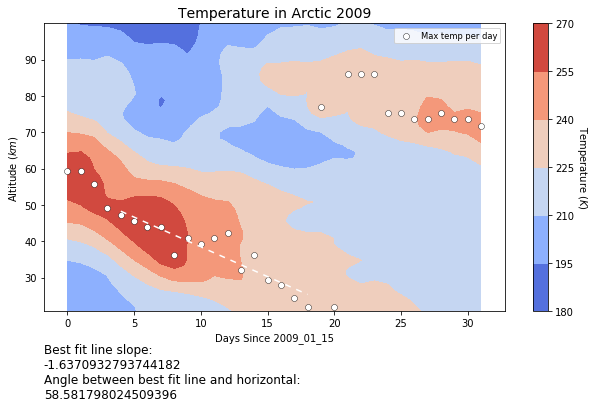

NameError: name 'plot' is not defined

In [32]:
def plot_c(dfs):
    """Display two contour plots given DFS, a list of WACCM data files to plot."""
    nc_f = dfs[0]
    nc_fid = Dataset(nc_f, mode='r')
    
    temps = arctic(dfs, 'T')
    winds = arctic(dfs, 'U')

    Mtemps = tmax(dfs, temps)

    mwest = wminwest(dfs, winds)
    zalts, zdays = wzeros(dfs, winds)
    
    #instead of inserting different dfs here, insert it in temps/winds
    plot_ctemp(dfs, temps, Mtemps)
    plot.cwind(dfs, winds, mwest, zalts, zdays)
plot_c(data2009)
plot_c(data2013)

In [ ]:
max_temp = 268.365631
round(max_temp)
a = max(16.24, 215.24)
round(a, 3)

### Pandas dataframe storing SSW info

In [ ]:
#for some reason max_temp wont round
#change cut alt into a stratosphere lower/upper limit variable

In [ ]:
#if wind goes from E -> W, then include it as a row in the df
#for now, take best fit from -5 to +10 from ssw starting date, adjust as needed
years = [data2009, data2013]

# Creating empty dataframe
df = pd.DataFrame(0, columns=['Year', 'SSW Start Date', 'Max Temp', 'Slope', 'Angle'], index=range(len(years)))

for i in range(len(years)):
    year = years[i]
    
    start_i = sswstart(year)
    datestr = year[start_i][16:26]
    max_temp = max(arctic(year, 'T')[alt_i(100): alt_i(20)].flatten())
    m = slope(year)
    
    if sswstart(year) != None:
        df.iloc[i] = [datestr[:4], datestr[5:], round(max_temp, 3), round(m, 3), round(angle(m), 3)]
df

In [ ]:
# Saving the time series into csv file
df.to_csv('SSW Info.csv')

### Misc

In [ ]:
#Example plot
#Plot the temps across 32 days at lev = 0 aka alt = 20, lat=70
tim = range(32)
win = winds[lev_i(10), :]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
ax.set_facecolor('white')

plt.plot(tim, win) 
plt.xlabel('Days Since 01/15/2009')
plt.ylabel('Wind ( $K$ )')
plt.title('Average Wind in Arctic (alt = 20 $km$) ')

plt.show()

In [ ]:
#Extracts and displays alt v. temp data    
def plot(df):
    """Plots temperature over altitude for DF, a nc file, for the Arctic (70N)."""
    nc_f = df
    nc_fid = Dataset(nc_f, mode='r')
    
    def extract(df, lat=70):
        """Extracts data from DF, a data file. Returns zonal mean temperature data in the form of a 
        2D array with axis0 as pressure levels and axis1 as latitudes."""
    
        temp = nc_fid.variables['T'][:]
        
        #Find mean of the 8 recorded temperatures for every lev, lat, lon combo
        #d_avg[b][c][d] ; b = lev, c = lat, d = lon
        d_avgs = np.sum(temp, axis=0) / len(temp)

        #Find mean across longitude, aka mean of the recorded temps for every lev and lat combo
        #zonal_means[b][c] ; b = lev, c = lat
        zonal_means = np.sum(d_avgs, axis=2) / len(lon)
        
        #Select latitude (default 70N)
        zonal_means = zonal_means[:, lat_i(lat)]
        
        return zonal_means
    
    def display(zonals, start=100, end=20):
        """Displays temp v. alt plot. ZONALS is the output of extract. 
        START and END determine the range of altitude."""
        
        #Set altitude range (default 20-100 km)
        cut_alt = alt[alt_i(start): alt_i(end)]
        cut_zonals = zonals[alt_i(start): alt_i(end)]
    
        #Splice date from nc file name
        date = nc_f[16:26]
        
        fig = plt.figure()
        fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
        plt.plot(cut_zonals, cut_alt)
        plt.xlabel('Temperature ( $K$ )')
        plt.ylabel('Altitude ( $km$ )')
        plt.title(date + ' Altitude v. Temperature in Arctic')
        plt.show()
        
    return display(extract(df))

def plot_all():
    """Displays a alt v. temp plot for every nc file listed in dfs."""
    for df in dfs:
        plot(df)
#plot_all()

In [ ]:
#Example plot using the new 3D array
cut_alt = alt[alt_i(100): alt_i(20)]
cut_temp = temps[alt_i(100): alt_i(20)]
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
plt.plot(cut_temp, cut_alt)
plt.legend(range(len(temps[0])), title="Days since 01/15", fontsize='small', loc=1)
plt.xlabel('Temperature ( $K$ )')
plt.ylabel('Altitude ( $km$ )')
plt.title('Average Temperature in Arctic')
plt.show()